## Mounting drive and uploading the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Installing the libraries

In [ ]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 KB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 13.4 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.1.1-py3-none-any.whl size=1466366 sha256=3b661a3cb86c25db397569885a79c44739552f87cde1d479caf2818fd00039ac
  Stored in directory: /root/.cache/pip/wheels/73/89/84/442d4814015c451509500658c0cbe3aff0ccfaf09753246243
Successfully built labelme
  Attempting uninstall: natsort
    Found existing installation: natsort 5.5.0
    Uninstal

In [13]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

## Collecting the data with open CV

In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Loading the images into the TF pipeline

In [3]:
images = tf.data.Dataset.list_files('drive/MyDrive/data/images/*.jpg',shuffle=False)

In [4]:
images.as_numpy_iterator().next()

b'drive/MyDrive/data/images/254d309f-b4c8-11ed-ad46-c475abf98e4e.jpg'

In [5]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
images = images.map(load_image)

In [7]:
images.as_numpy_iterator().next()

array([[[177, 129,  89],
        [177, 129,  89],
        [176, 131,  90],
        ...,
        [168, 114,  68],
        [170, 114,  67],
        [171, 115,  66]],

       [[178, 130,  90],
        [178, 130,  90],
        [176, 131,  90],
        ...,
        [167, 113,  67],
        [170, 114,  65],
        [171, 115,  66]],

       [[180, 132,  92],
        [179, 131,  91],
        [177, 132,  90],
        ...,
        [167, 113,  66],
        [168, 115,  65],
        [170, 117,  65]],

       ...,

       [[152,  88,  17],
        [152,  88,  17],
        [153,  88,  20],
        ...,
        [166,  98,  17],
        [169, 101,  20],
        [170, 102,  21]],

       [[153,  86,  18],
        [153,  86,  18],
        [151,  86,  18],
        ...,
        [166,  98,  15],
        [168, 100,  17],
        [169, 101,  18]],

       [[153,  86,  18],
        [152,  85,  17],
        [150,  85,  17],
        ...,
        [165,  97,  12],
        [167,  99,  16],
        [167,  99,  16]]

In [8]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

## Ploting the images with matplotlib

In [9]:
image_generator = images.batch(4).as_numpy_iterator()

In [10]:
plot_images = image_generator.next()

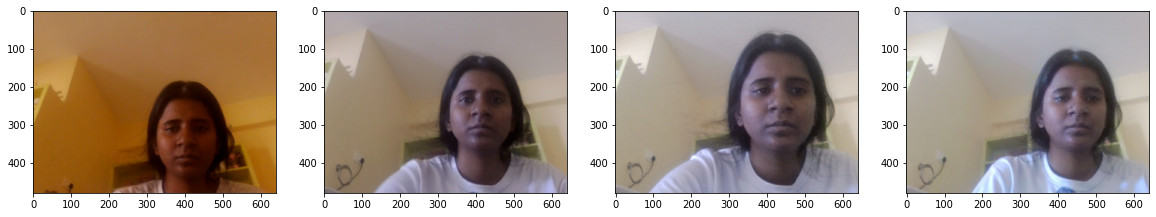

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

## Picking the corresponding labels

In [14]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('drive/MyDrive/data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('drive/MyDrive/data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('drive/MyDrive/data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)     

## Performing data augumentation

In [15]:
import albumentations as alb


In [16]:

augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [24]:
img = cv2.imread(os.path.join('drive/MyDrive/data','val', 'images',"9f8b7589-b4c8-11ed-adcc-c475abf98e4e.jpg"))

In [25]:
img

array([[[204, 186, 179],
        [204, 186, 179],
        [204, 186, 179],
        ...,
        [190, 171, 166],
        [190, 171, 166],
        [189, 170, 165]],

       [[203, 185, 178],
        [203, 185, 178],
        [203, 185, 178],
        ...,
        [187, 171, 165],
        [189, 170, 165],
        [186, 170, 164]],

       [[203, 185, 178],
        [203, 185, 178],
        [203, 185, 178],
        ...,
        [185, 170, 167],
        [187, 171, 165],
        [185, 171, 165]],

       ...,

       [[124, 143, 150],
        [122, 141, 148],
        [122, 140, 147],
        ...,
        [116, 132, 139],
        [119, 135, 142],
        [122, 138, 145]],

       [[122, 144, 150],
        [123, 142, 149],
        [123, 141, 148],
        ...,
        [107, 121, 127],
        [110, 124, 130],
        [113, 127, 133]],

       [[118, 140, 146],
        [118, 140, 146],
        [121, 139, 146],
        ...,
        [103, 115, 121],
        [103, 117, 123],
        [106, 120, 126]]

## Reading a label to extract co ordiantes

In [26]:
with open(os.path.join('drive/MyDrive/data','val', 'labels','9f8b7589-b4c8-11ed-adcc-c475abf98e4e.json'), 'r') as f:
    label = json.load(f)


In [27]:
label

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[230.71428571428572, 167.38095238095235],
    [521.1904761904761, 431.6666666666667]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\9f8b7589-b4c8-11ed-adcc-c475abf98e4e.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZH

In [28]:
label["shapes"][0]["points"]

[[230.71428571428572, 167.38095238095235],
 [521.1904761904761, 431.6666666666667]]

In [29]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [30]:
coords

[230.71428571428572, 167.38095238095235, 521.1904761904761, 431.6666666666667]

In [31]:
coords = list(np.divide(coords, [640,480,640,480]))

In [32]:
coords

[0.36049107142857145,
 0.3487103174603174,
 0.814360119047619,
 0.8993055555555556]

In [33]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [34]:
augmented['bboxes'][0][2:]

(0.847089947089947, 0.9548148148148149)

In [35]:
augmented['bboxes']

[(0.2015873015873016,
  0.36751322751322746,
  0.847089947089947,
  0.9548148148148149)]

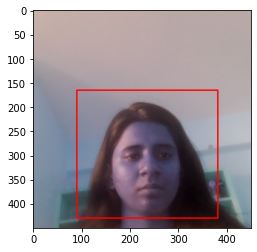

In [36]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [37]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('drive/MyDrive/data', partition, 'images')):
        img = cv2.imread(os.path.join('drive/MyDrive/data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('drive/MyDrive/data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('drive/MyDrive/aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('drive/MyDrive/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

## Uploading augumented data into TF pipeline

In [38]:
train_images = tf.data.Dataset.list_files('drive/MyDrive/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [39]:
test_images = tf.data.Dataset.list_files('drive/MyDrive/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [40]:
val_images = tf.data.Dataset.list_files('drive/MyDrive/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

## lets look our data


In [41]:
train_images.as_numpy_iterator().next()

array([[[0.8730392 , 0.8573529 , 0.85343134],
        [0.8730392 , 0.8573529 , 0.85343134],
        [0.8745098 , 0.85882354, 0.85490197],
        ...,
        [0.8666667 , 0.8627451 , 0.84705883],
        [0.87444854, 0.8593137 , 0.8473652 ],
        [0.8745098 , 0.85882354, 0.8519608 ]],

       [[0.8740196 , 0.85833335, 0.8544118 ],
        [0.8740196 , 0.85833335, 0.8544118 ],
        [0.8745098 , 0.85882354, 0.85490197],
        ...,
        [0.8666054 , 0.86268383, 0.84699756],
        [0.8726103 , 0.85968137, 0.84699756],
        [0.87267154, 0.8575368 , 0.8504902 ]],

       [[0.8745098 , 0.85882354, 0.85490197],
        [0.8745098 , 0.85882354, 0.85490197],
        [0.8661765 , 0.8622549 , 0.8544118 ],
        ...,
        [0.8632353 , 0.8593137 , 0.84362745],
        [0.8632353 , 0.8593137 , 0.84362745],
        [0.8678309 , 0.85655636, 0.84822303]],

       ...,

       [[0.87058824, 0.85490197, 0.8509804 ],
        [0.8745098 , 0.85882354, 0.85490197],
        [0.8745098 , 0

In [42]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

## Uploading the labels in the TF pipeline

In [44]:
train_labels = tf.data.Dataset.list_files('drive/MyDrive/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [46]:
test_labels = tf.data.Dataset.list_files('drive/MyDrive/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [48]:
val_labels = tf.data.Dataset.list_files('drive/MyDrive/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [49]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1936, 0.1019, 1.    , 1.    ], dtype=float16))

In [50]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1800, 1800, 600, 600, 660, 660)

## Zipping the corresponding image and its label

In [51]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [52]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [53]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [56]:
train.as_numpy_iterator().next()[1]


(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8), array([[0.      , 0.001164, 0.8193  , 0.9326  ],
        [0.      , 0.      , 0.853   , 0.909   ],
        [0.3333  , 0.001164, 0.9155  , 0.61    ],
        [0.      , 0.0712  , 0.6685  , 0.9795  ],
        [0.      , 0.2788  , 0.323   , 0.9824  ],
        [0.3555  , 0.2     , 0.874   , 0.803   ],
        [0.654   , 0.338   , 1.      , 1.      ],
        [0.4324  , 0.003597, 1.      , 0.718   ]], dtype=float16))

In [55]:
data_samples = train.as_numpy_iterator()

In [57]:
res = data_samples.next()

## Plotting the image with matplotlib

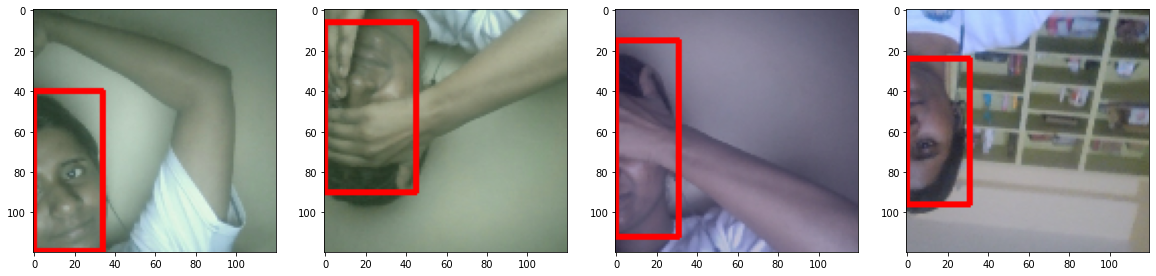

In [58]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

## Model Buiding

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

## Using VGG16 pre trained models's knowledge

In [60]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [61]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## Building model with  help of functional API

In [62]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [63]:
facetracker = build_model()

In [64]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [65]:
X, y = train.as_numpy_iterator().next()

In [66]:
X.shape

(8, 120, 120, 3)

In [67]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 8s 8s/step


In [68]:
classes, coords

(array([[0.49476546],
        [0.5913073 ],
        [0.5199078 ],
        [0.51975656],
        [0.5126713 ],
        [0.5423403 ],
        [0.57340723],
        [0.5650223 ]], dtype=float32),
 array([[0.4487695 , 0.48985973, 0.51158166, 0.5373711 ],
        [0.6442687 , 0.49383947, 0.49807417, 0.5846092 ],
        [0.53086066, 0.4762595 , 0.59128696, 0.61427706],
        [0.46476507, 0.50576985, 0.53299963, 0.57935655],
        [0.47100857, 0.49771005, 0.5345274 , 0.53493816],
        [0.48295248, 0.5192801 , 0.5179683 , 0.583965  ],
        [0.50757   , 0.49624318, 0.49441886, 0.518914  ],
        [0.5513867 , 0.43708673, 0.5431952 , 0.58171797]], dtype=float32))

In [69]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [71]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [72]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [73]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [74]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.8676186>

In [75]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6180774>

In [76]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.8676186>

In [77]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [78]:
model = FaceTracker(facetracker)

In [79]:
model.compile(opt, classloss, regressloss)

In [80]:
logdir='logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
225/225 [==============================] - 34s 81ms/step - total_loss: 0.3404 - class_loss: 0.0406 - regress_loss: 0.3201 - val_total_loss: 1.5307 - val_class_loss: 1.0411 - val_regress_loss: 1.0101
Epoch 2/10
225/225 [==============================] - 24s 74ms/step - total_loss: 0.1035 - class_loss: 0.0167 - regress_loss: 0.0951 - val_total_loss: 0.5404 - val_class_loss: 0.3414 - val_regress_loss: 0.3697
Epoch 3/10
225/225 [==============================] - 24s 77ms/step - total_loss: 0.0671 - class_loss: 0.0054 - regress_loss: 0.0644 - val_total_loss: 5.7388 - val_class_loss: 5.9413 - val_regress_loss: 2.7681
Epoch 4/10
225/225 [==============================] - 23s 74ms/step - total_loss: 0.0493 - class_loss: 0.0014 - regress_loss: 0.0486 - val_total_loss: 1.4891 - val_class_loss: 0.6080 - val_regress_loss: 1.1851
Epoch 5/10
225/225 [==============================] - 23s 73ms/step - total_loss: 0.0554 - class_loss: 0.0091 - regress_loss: 0.0508 - val_total_loss: 1.0672 - 

In [83]:
hist.history

{'total_loss': [0.040518999099731445,
  0.05896642059087753,
  0.09859815239906311,
  0.04073933884501457,
  0.0355004221200943,
  0.031967658549547195,
  0.03486131876707077,
  0.03134094178676605,
  0.019368765875697136,
  0.008777914568781853],
 'class_loss': [0.0005921311676502228,
  0.00012089555821148679,
  1.792651710275095e-05,
  9.299788507632911e-05,
  2.4781380489002913e-05,
  0.0002230159007012844,
  4.526475095190108e-05,
  2.8461907277232967e-05,
  0.00020706882060039788,
  6.6012835304718465e-06],
 'regress_loss': [0.04022293537855148,
  0.05890597403049469,
  0.09858918935060501,
  0.04069283977150917,
  0.035488031804561615,
  0.031856149435043335,
  0.034838687628507614,
  0.03132671117782593,
  0.019265230745077133,
  0.008774613961577415],
 'val_total_loss': [1.5306572914123535,
  0.5403635501861572,
  5.738765239715576,
  1.4891040325164795,
  1.0672179460525513,
  4.757782936096191,
  4.651002883911133,
  5.882329940795898,
  1.98052179813385,
  2.0760467052459717

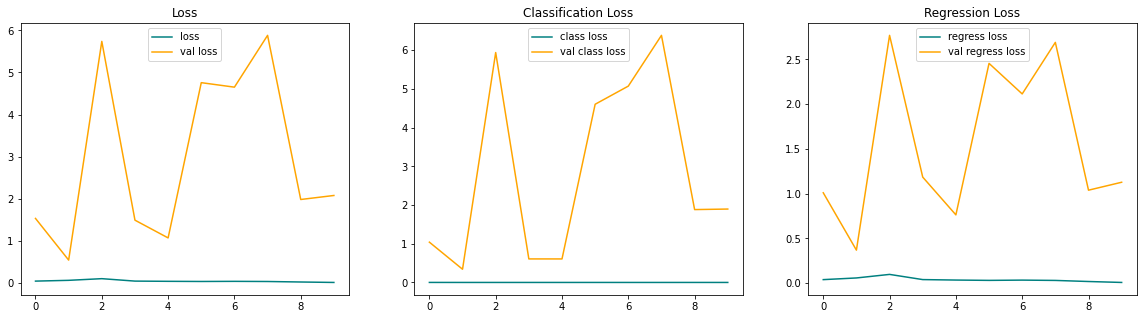

In [84]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [85]:
test_data = test.as_numpy_iterator()

In [91]:
test_sample = test_data.next()

In [92]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 41ms/step


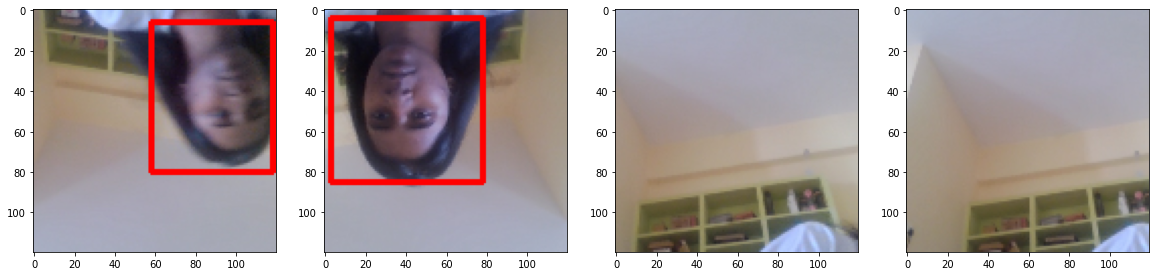

In [93]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [94]:
from tensorflow.keras.models import load_model

In [98]:
facetracker.save('drive/MyDrive/data/facetracker.h5')
facetracker = load_model('drive/MyDrive/data/facetracker.h5')

In [99]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
 